In [81]:
import pandas as pd
import numpy as np

## Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns 
plt.rcParams['figure.figsize'] = (8,4)

## Supervised learning with model evaluation and optimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cols = df.columns[df.columns != 'diagnosis']

# assigning feature dataframe
X = df.iloc[:, 1:]

#assigning target variable
y = df.iloc[:,0]

#X.head()

In [5]:
#y.head()

In [6]:
#y.unique()

In [7]:
le = LabelEncoder()

y = le.fit_transform(y)
#y

In [8]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.columns = cols

In [9]:
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X_scaled)

In [11]:
# summarize components
#fit.components_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

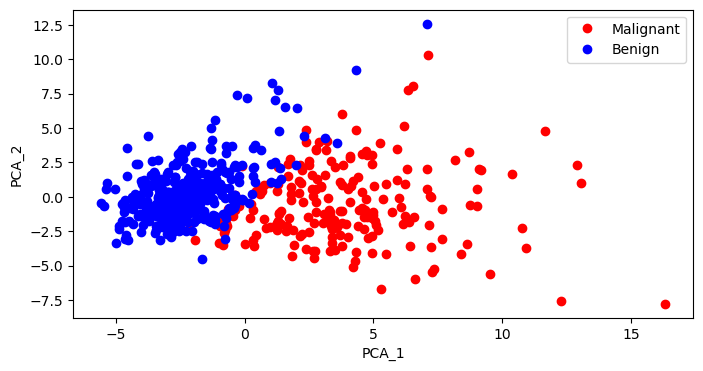

In [12]:
X_pca = pca.transform(X_scaled)

df_PCA = pd.DataFrame()

df_PCA['PCA_1'] = X_pca[:,0]
df_PCA['PCA_2'] = X_pca[:,1]
df_PCA['PCA_3'] = X_pca[:,2]

plt.plot(df_PCA['PCA_1'][df.diagnosis == 'M'],df_PCA['PCA_2'][df.diagnosis == 'M'],'o', color = 'r')
plt.plot(df_PCA['PCA_1'][df.diagnosis == 'B'],df_PCA['PCA_2'][df.diagnosis == 'B'],'o', color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

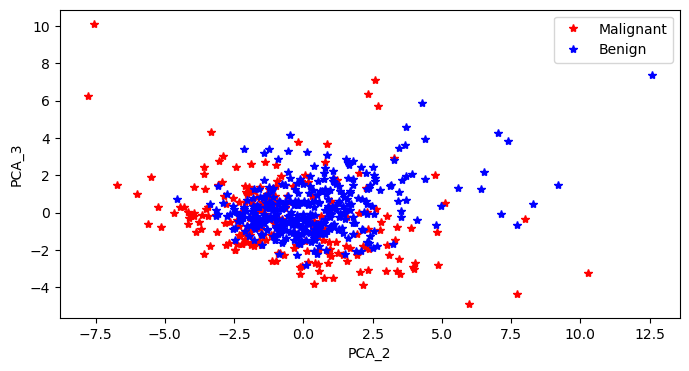

In [13]:
plt.plot(df_PCA['PCA_2'][df.diagnosis == 'M'],df_PCA['PCA_3'][df.diagnosis == 'M'],'*', color = 'r')
plt.plot(df_PCA['PCA_2'][df.diagnosis == 'B'],df_PCA['PCA_3'][df.diagnosis == 'B'],'*', color = 'b')

plt.xlabel('PCA_2')
plt.ylabel('PCA_3')
plt.legend(['Malignant','Benign'])
plt.show()

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

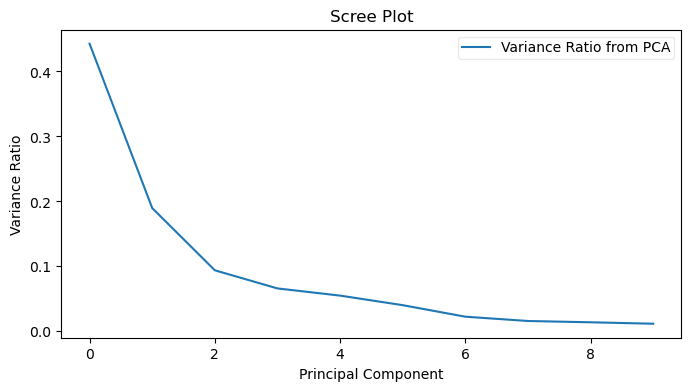

In [14]:
#The amount of variance explained by each PC
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')

leg = plt.legend(['Variance Ratio from PCA'], loc='best', borderpad=0.3, markerscale=0.1)
leg.get_frame().set_alpha(0.4)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

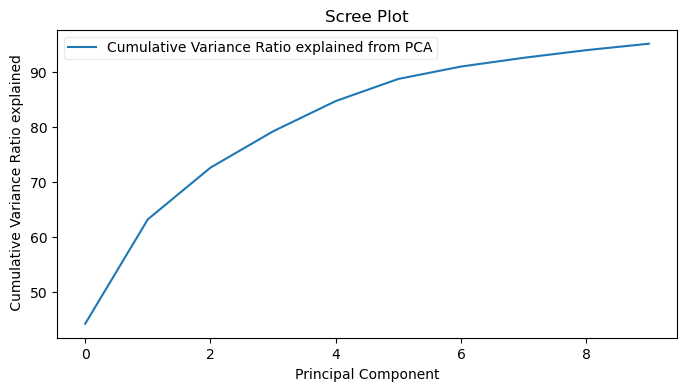

In [15]:
plt.plot(var1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel(' Cumulative Variance Ratio explained')

leg = plt.legend(['Cumulative Variance Ratio explained from PCA'], loc='best', borderpad=0.3, markerscale=0.1)
leg.get_frame().set_alpha(0.4)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the first scree plot. Therefore, it can be concluded based on the first scree plot that the first two components should be retained.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

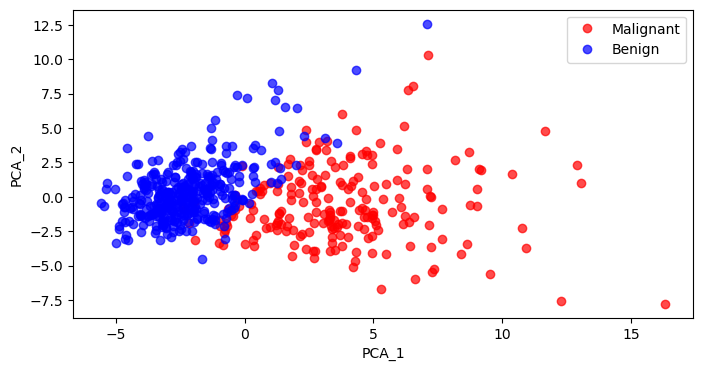

In [16]:
X_pca = pca.transform(X_scaled)

df_PCA = pd.DataFrame()

df_PCA['PCA_1'] = X_pca[:,0]
df_PCA['PCA_2'] = X_pca[:,1]

plt.plot(df_PCA['PCA_1'][df.diagnosis == 'M'],df_PCA['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(df_PCA['PCA_1'][df.diagnosis == 'B'],df_PCA['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [19]:
#X_pca

## A Summary of the Data Preprocessing Approach used here:

1. Assign the independent features to a Pandas dataframe X and the target variable to y
2. Tansform the class labels from their original string representation ('M' and 'B') into integers using LabelEncoder
3. Standardize the data using Standardscaler(mean=0 and unit standard deviation).
4. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
5. Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
6. Construct the projection matrix W from the selected k eigenvectors.
7. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.


#### Classification with SVM using cross-validation

As discussed in this notebook, splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify **so-called folds** so that the data is divided into similarly-sized folds. 

* Training occurs by taking all folds except one – referred to as the holdout sample. 
* On the completion of the training, you test the performance of your fitted model using the holdout sample. 

* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. 

* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. 

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. 

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [76]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2, stratify=y)

#Create an SVM classifier and train it on 80% of the data set.
clf1 = SVC(probability=True)
clf1.fit(X_train, y_train)

#Analyze accuracy of predictions on 20% of the holdout test sample.
classifier_score1 = clf1.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score1))


The classifier accuracy score is 0.96



In [77]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds1 = 3
cv_error = np.average(cross_val_score(clf1, X_scaled, y, cv=n_folds1))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds1, cv_error))

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds2 = 5
cv_error = np.average(cross_val_score(clf1, X_scaled, y, cv=n_folds2))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds2, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97


The 5-fold cross-validation accuracy score for this classifier is 0.97



In [78]:
#use pipelines
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores_3fold = cross_val_score(clf2, X_scaled, y, cv=3)
scores_5fold = cross_val_score(clf2, X_scaled, y, cv=5)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds1 = 3
cv_error = np.average(cross_val_score(clf2, X_scaled, y, cv=n_folds1))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds1, cv_error))

avg_3fold = (100*np.mean(scores_3fold), 100*np.std(scores_3fold)/np.sqrt(scores_3fold.shape[0]))
print("Average score and uncertainty for {}-fold cross validation: ".format(n_folds1))
print("(%.2f +- %.3f)%%"%avg_3fold)

print('-'*100)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds2 = 5
cv_error = np.average(cross_val_score(clf2, X_scaled, y, cv=n_folds2))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds2, cv_error))

avg_5fold = (100*np.mean(scores_5fold), 100*np.std(scores_5fold)/np.sqrt(scores_5fold.shape[0]))
print("Average score and uncertainty for {}-fold cross validation: ".format(n_folds2))
print("(%.2f +- %.3f)%%"%avg_5fold)

The 3-fold cross-validation accuracy score for this classifier is 0.94
Average score and uncertainty for 3-fold cross validation: 
(94.20 +- 0.496)%
----------------------------------------------------------------------------------------------------
The 5-fold cross-validation accuracy score for this classifier is 0.95
Average score and uncertainty for 5-fold cross validation: 
(95.08 +- 0.402)%


In [79]:
print(y_train.shape)
print(y_test.shape)
print(y.shape)

(455,)
(114,)
(569,)


From the above results, it can be observed that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that must be carried out carefully. But it is out of scope of this particular project so we will use entire feature set to train our data.

In [80]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf1.fit(X_train, y_train).predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(cmat)
print('-'*50)
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Confusion Matrix:

[[71  1]
 [ 3 39]]
--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Observation 
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign
= 0 (indicates abscence).

* The classifier made a total of 114 predictions (i.e 114 patients were being tested for the presence breast cancer).
* Out of those 114 cases, the classifier predicted "yes" 40 times, and "no" 74 times.
* In reality, 42 patients in the sample have the disease, and 72 patients do not.

#### Rates as computed from the confusion matrix
1. **Accuracy**: Overall, how often is the classifier correct?
    * (TP+TN)/total = (39+71)/114 = 0.96

2. **Misclassification Rate**: Overall, how often is it wrongly classified?
    * (FP+FN)/total = (1+3)/114 = 0.04 equivalent to **(1-accuracy)** also known as ***"Error Rate"***

3. **True Positive Rate:** When it's actually yes, how often does it predict 1?
   * TP/actual yes = 39/42 = 0.93 also known as "Sensitivity" or ***"Recall"***

4. **False Positive Rate**: When it's actually 0, how often does it predict 1?
   * FP/actual no = 1/72 = 0.01

5. **Specificity**: When it's actually 0, how often does it predict 0? (also know as **true positive rate**)
   * TN/actual no = 71/72 = 0.99 equivalent to **(1-false positive rate)**

6. **Precision**: When it predicts 1, how often is it correct?
   * TP/predicted yes = 39/40 = 0.98

7. **Prevalence**: How often does the yes condition actually occur in our sample?
   * actual yes/total = 42/114 = 0.37

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Receiver operating characteristic example')

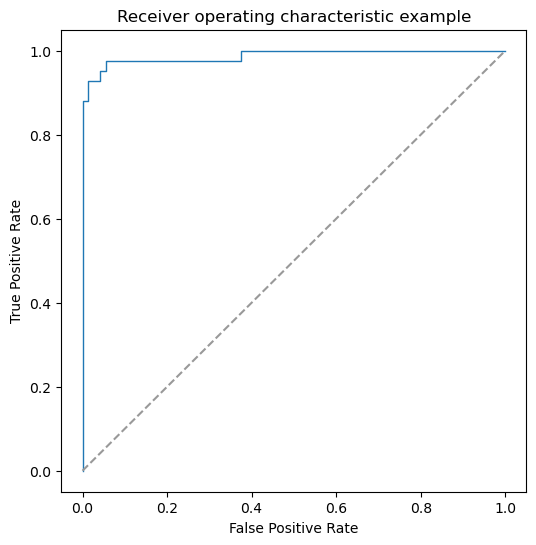

In [85]:
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(6, 6))
probas_ = clf1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.axes().set_aspect(1)

#### Model Accuracy: Receiver Operating Characteristic (ROC) curve

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted).

 Model says "+" |Model says  "-" <br>
--- | --- | --- <br>
`True positive` | `False negative` | Actual: "+" <br>
 `False positive`  | `True negative` |  Actual: "-" <br>
 --- | --- | --- <br>
 In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:
> * True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
> * False positive rate:       fpr = fp / (fp + tn)
> * True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can  express
* the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").
          

#### Interpreting the ROC Curve
* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

* For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, here tpr = 0.93 and fpr = 0.01, Then, the probability of being in the true positive group is $(0.93 / (0.93 + 0.01)) = 99\%$. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification mode